In [2]:
#IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import KFold

In [3]:
#LOADING THE DATASET IN THE PROJECT
dataset=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
dataset.info()#INFORMATION ABOUT THE DATA ABOUT HAVING NULL VALUES
dataset.head()#PRINTS UPPER 5 ROWS IN THE DATA 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
#DECLARING CGPA AS THE OUTPUT
output=dataset.CGPA
output.head()#PRINTS UPPER 5 ROWS IN THE DATA 

0    2.205
1    2.008
2    3.608
3    1.906
4    3.448
Name: CGPA, dtype: float64

In [5]:
#SEPARATING INPUT AND OUTPUT FEATURES

courses=dataset.drop(['CGPA','Seat No.'],axis="columns")

In [6]:
courses.info()#INFORMATION ABOUT THE DATA ABOUT HAVING NULL VALU

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PH-121     571 non-null    object
 1   HS-101     571 non-null    object
 2   CY-105     570 non-null    object
 3   HS-105/12  570 non-null    object
 4   MT-111     569 non-null    object
 5   CS-105     571 non-null    object
 6   CS-106     569 non-null    object
 7   EL-102     569 non-null    object
 8   EE-119     569 non-null    object
 9   ME-107     569 non-null    object
 10  CS-107     569 non-null    object
 11  HS-205/20  566 non-null    object
 12  MT-222     566 non-null    object
 13  EE-222     564 non-null    object
 14  MT-224     564 non-null    object
 15  CS-210     564 non-null    object
 16  CS-211     566 non-null    object
 17  CS-203     566 non-null    object
 18  CS-214     565 non-null    object
 19  EE-217     565 non-null    object
 20  CS-212     565 non-null    objec

In [7]:
AssignGPs={
    "A+": 4.0,
    "A": 4.0,
    "A-" : 3.7,
    "B+" : 3.4,
    "B" : 3.0,
    "B-" : 2.7,
    "C+" : 2.4,
    "C" : 2.0,
    "C-" : 1.7,
    "D+" : 1.4,
    "D" : 1.0,
    "F" : 0.0,
    "WU" :0
}

In [8]:
#ASSIGNING GRADE POINTS TO ALL THE GRADES IN THE DATASET
for i in courses:
    courses[i]=courses[i].map(AssignGPs)
courses.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0


In [9]:
#CHECKING FOR NULL VALUES IN THE DATASET
courses.columns[courses.isna().any()]

Index(['CY-105', 'HS-105/12', 'MT-111', 'CS-106', 'EL-102', 'EE-119', 'ME-107',
       'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211',
       'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303',
       'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318',
       'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414',
       'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [10]:
#FILLING THE NULL VALUES BY 0
courses[0:]=courses[0:].fillna(0)

In [11]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    float64
 1   HS-101     571 non-null    float64
 2   CY-105     571 non-null    float64
 3   HS-105/12  571 non-null    float64
 4   MT-111     571 non-null    float64
 5   CS-105     571 non-null    float64
 6   CS-106     571 non-null    float64
 7   EL-102     571 non-null    float64
 8   EE-119     571 non-null    float64
 9   ME-107     571 non-null    float64
 10  CS-107     571 non-null    float64
 11  HS-205/20  571 non-null    float64
 12  MT-222     571 non-null    float64
 13  EE-222     571 non-null    float64
 14  MT-224     571 non-null    float64
 15  CS-210     571 non-null    float64
 16  CS-211     571 non-null    float64
 17  CS-203     571 non-null    float64
 18  CS-214     571 non-null    float64
 19  EE-217     571 non-null    float64
 20  CS-212    

In [12]:
#MULTIPLYING THE GRADE POINTS BY THEIR CREDIT HOURS
fourcd=[0,5,6,8,9,10,13,18,19,20,21,25,30,31,35,38,39,40]
thirdcd=[2,3,4,7,12,14,15,16,22,23,26,28,32,33,34,37]
secondcd=[1,11,24,27,29,36]
onecd=[17]
for i in fourcd:
  courses.iloc[:, i]=courses.iloc[:, i]*4
for i in thirdcd:
  courses.iloc[:, i]=courses.iloc[:, i]*3
for i in secondcd:
  courses.iloc[:, i]=courses.iloc[:, i]*2
    
courses.head()#PRINTS UPPER 5 ROWS IN THE DATA 

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,8.0,5.1,5.1,5.1,6.8,7.4,12.0,6.8,12.0,14.8
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,4.0,4.2,3.0,6.0,4.0,7.4,8.1,8.0,8.0,12.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,14.8,9.0,9.0,12.0,8.0,8.0,12.0,16.0,14.8,16.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,6.8,4.2,6.0,4.2,6.8,5.4,9.0,9.6,9.6,9.6
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,14.8,8.1,10.2,10.2,10.8,7.4,12.0,14.8,14.8,16.0


# MODEL1(FIRST YEAR GPs)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
#SEPARATING THE COURSES OF FIRST YEAR FOR MODEL 1 from data
first_year=courses.iloc[:, 0:11]

In [14]:
first_year.head()#PRINTS UPPER 5 ROWS IN THE DATA 

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,6.8
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,13.6
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,10.8
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,4.0
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,8.0


In [15]:
#SPLITTING THE DATASET INTO TRAINING AND TESTING PART
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(first_year,output,test_size=0.2)

In [16]:
len(X_test)

115

In [17]:
len(X_train)

456

array([[<AxesSubplot:title={'center':'PH-121'}>,
        <AxesSubplot:title={'center':'HS-101'}>,
        <AxesSubplot:title={'center':'CY-105'}>],
       [<AxesSubplot:title={'center':'HS-105/12'}>,
        <AxesSubplot:title={'center':'MT-111'}>,
        <AxesSubplot:title={'center':'CS-105'}>],
       [<AxesSubplot:title={'center':'CS-106'}>,
        <AxesSubplot:title={'center':'EL-102'}>,
        <AxesSubplot:title={'center':'EE-119'}>],
       [<AxesSubplot:title={'center':'ME-107'}>,
        <AxesSubplot:title={'center':'CS-107'}>, <AxesSubplot:>]],
      dtype=object)

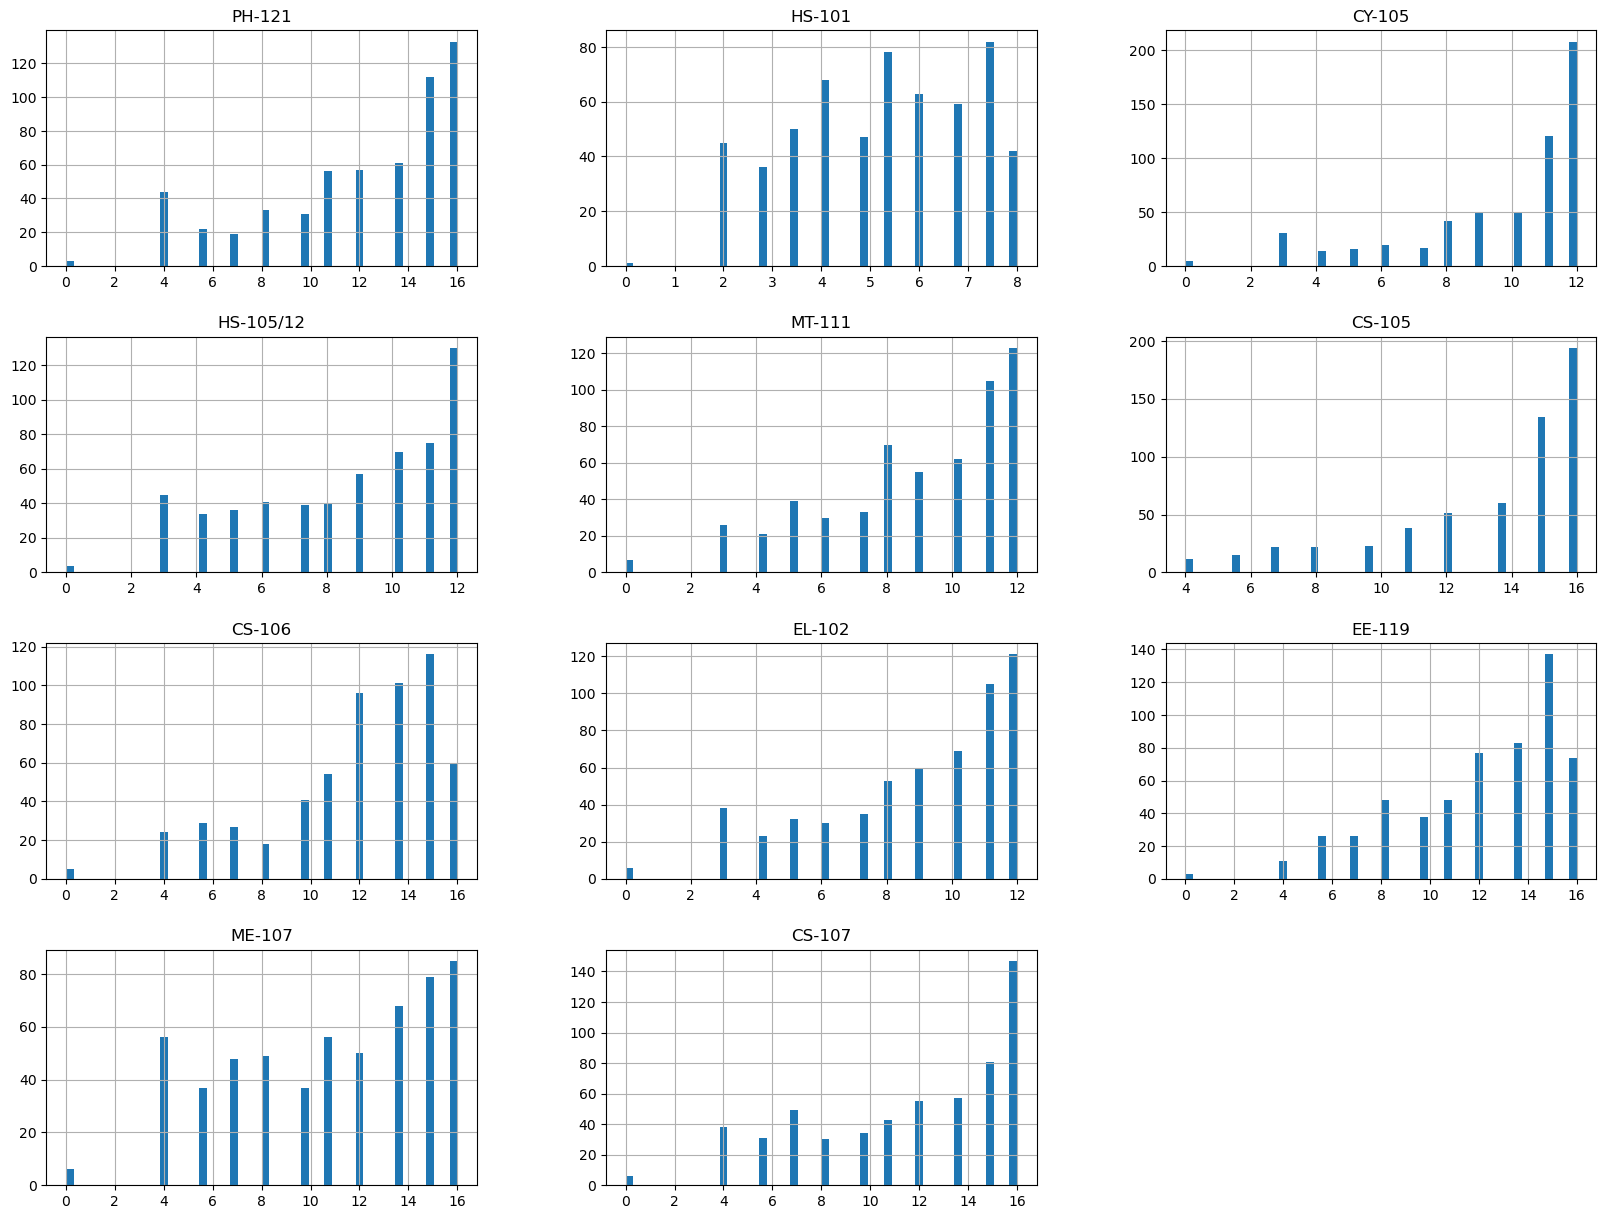

In [18]:
first_year.hist(bins=50, figsize=(20, 15)) #It shows each course's GPA effect on CGPA

# Linear Regression Model

In [19]:
Linear_Regression_Model_model_1=LinearRegression()

In [20]:
Linear_Regression_Model_model_1.fit(X_train,y_train) 

LinearRegression()

In [21]:
Predictions_of_Linear_Regression_model_1=Linear_Regression_Model_model_1.predict(X_test) #Try to predict(output) of test data
Predictions_of_Linear_Regression_model_1

array([2.80266391, 3.19365959, 3.62341592, 3.38137399, 2.67200101,
       2.6985658 , 3.5206792 , 3.57720983, 2.39900145, 2.4356463 ,
       3.54693512, 2.73846644, 3.19975084, 3.49584785, 3.49989238,
       2.50343535, 3.30690005, 3.76398408, 1.83942296, 3.80966516,
       2.33914776, 3.53890028, 3.00073038, 3.63296771, 2.95255677,
       3.62404888, 3.24930718, 2.2699206 , 2.79455516, 3.38881602,
       2.0149714 , 3.72741065, 2.6878121 , 2.01061268, 2.53444604,
       2.74156339, 2.85219375, 3.08742532, 3.79043167, 3.13125714,
       3.74149525, 3.62410089, 3.52173734, 2.15124433, 2.85281607,
       2.90081163, 1.44158936, 3.2607067 , 2.663781  , 2.40616005,
       3.49819822, 3.22915712, 3.12276873, 3.73653129, 2.58565864,
       2.72128466, 2.43171482, 3.21556663, 3.58949482, 3.56223865,
       2.40402685, 3.30367429, 3.64739955, 2.86247202, 3.25483737,
       3.43178464, 2.14491693, 3.28361069, 2.39789541, 2.92492737,
       3.14853034, 3.28705872, 3.50693445, 3.45456183, 3.28986

In [22]:
#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(Linear_Regression_Model_model_1.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Linear_Regression_Model_model_1.score(X_test,y_test)))

Accuracy on training set: 0.873
Accuracy on test set: 0.782


In [23]:
###Evaluating the model

In [24]:
#calculate rmse to find error in model. Less rmse good model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_Linear_Regression_model_1)
rmse_of_Linear_Regression_1_model_1=np.sqrt(mse)
rmse_of_Linear_Regression_1_model_1

0.27689781181834255

In [25]:
#Try cross validation to overcome overfitting if happens and then take rmse for every round in cross validation
from sklearn.model_selection import cross_val_score
cross_value_1=cross_val_score(Linear_Regression_Model_model_1, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_Linear_Regression_model_1=np.sqrt(-cross_value_1)
rmse_of_Linear_Regression_model_1

array([0.3430853 , 0.21457423, 0.31044614, 0.28894457, 0.22960013,
       0.40737791, 0.33882045, 0.19784917, 0.25025025, 0.3213962 ])

In [26]:
#calculate r^2 metric to find accuracy in model. More its value more better model
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,Predictions_of_Linear_Regression_model_1)
r2_score1

0.7824205671638002

# RandomForest

In [27]:
from sklearn.ensemble import RandomForestRegressor
Random_Forest_Model_model_1=RandomForestRegressor()

In [28]:
Random_Forest_Model_model_1.fit(X_train,y_train )

RandomForestRegressor()

In [29]:
Predictions_of_Random_Forest_model_1=Random_Forest_Model_model_1.predict(X_test)#Try to predict(output) of test data
Predictions_of_Random_Forest_model_1

array([3.08952   , 3.1456    , 3.51374   , 3.26113   , 2.73142   ,
       2.54955   , 3.61283   , 3.61001   , 2.29863   , 2.64021   ,
       3.58933   , 2.96062   , 3.37286   , 3.51196   , 3.36409   ,
       2.71197   , 3.43768   , 3.81698   , 2.15039   , 3.91305   ,
       2.40027   , 3.63121   , 3.02916   , 3.73683   , 2.90168   ,
       3.494     , 3.3303    , 2.23469   , 2.74376   , 3.25501   ,
       2.09579   , 3.658745  , 2.54052   , 1.97596   , 2.32985   ,
       3.07293   , 2.80451   , 3.34696   , 3.813355  , 3.05456   ,
       3.879415  , 3.54787533, 3.3936    , 2.21365   , 2.73155   ,
       3.08687   , 1.6425    , 3.33401   , 2.64759   , 2.60593   ,
       3.36018   , 3.34545   , 3.17909   , 3.72896   , 2.42493   ,
       2.73713   , 2.34286   , 2.9554    , 3.72695   , 3.6575    ,
       2.4927    , 3.22289   , 3.73128   , 2.68446   , 3.44711   ,
       3.29563   , 2.17382   , 3.23984   , 2.47571   , 2.92801   ,
       3.10574   , 3.1923    , 3.48555   , 3.60545   , 3.18973

In [30]:
#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(Random_Forest_Model_model_1.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Random_Forest_Model_model_1.score(X_test,y_test)))

Accuracy on training set: 0.980
Accuracy on test set: 0.773


# Evaluating the model

In [31]:
#calculate rmse to find error in model. Less rmse good model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_Random_Forest_model_1)
rmse_of_Random_Forest_1_model_1=np.sqrt(mse)
rmse_of_Random_Forest_1_model_1

0.2830073340994169

In [32]:
#Try cross validation to overcome overfitting if happens and then take rmse for every round in cross validation
from sklearn.model_selection import cross_val_score
cross_value_2=cross_val_score(Random_Forest_Model_model_1, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_Random_Forest_model_1=np.sqrt(-cross_value_2)
rmse_of_Random_Forest_model_1

array([0.29567423, 0.19481071, 0.37578412, 0.30531234, 0.27753939,
       0.32641528, 0.34020874, 0.23031793, 0.28715827, 0.33372584])

In [33]:
#calculate r^2 metric to find accuracy in model. More its value more better model
from sklearn.metrics import r2_score
r2_score2=r2_score(y_test,Predictions_of_Random_Forest_model_1)
r2_score2

0.7727132212686465

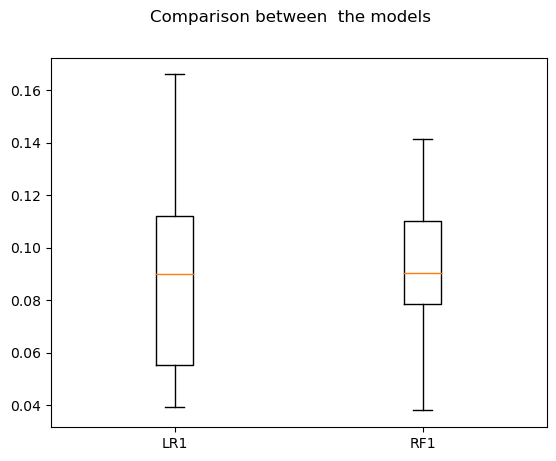

In [34]:
#For comparision between 2 models on basis of croos validation
results=[]
results.append(-cross_value_1)
results.append(-cross_value_2)
models=[('LR1',Linear_Regression_Model_model_1),('RF1',Random_Forest_Model_model_1) ]

scoring='accuracy'
names=[]
for name,model in models:
    names.append(name)
#Boxplot Algorithm Comparison
fig=plt.figure()
fig.suptitle('Comparison between  the models')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# MODEL2

In [35]:
###USING IST YEAR AND 2ND YEAR GPs
second_year=courses.iloc[:, 0:22]#SEPARATING THE COURSES OF FIRST YEAR  AND SECOND YEAR FOR MODEL 2 from data

In [36]:
second_year.head()#PRINTS UPPER 5 ROWS IN THE DATA 

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,3.0,14.8,8.1,7.2,4.2,1.4,4.0,16.0,4.0,6.8
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,8.1,6.8,4.2,4.2,3.0,2.0,4.0,10.8,8.0,4.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,12.0,16.0,12.0,12.0,12.0,4.0,14.8,16.0,14.8,16.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,4.2,10.8,3.0,6.0,10.2,2.4,4.0,5.6,4.0,4.0
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,12.0,14.8,11.1,11.1,8.1,4.0,14.8,16.0,14.8,14.8


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(second_year,output,test_size=0.2) #SPLITTING THE DATASET INTO TRAINING AND TESTING PART

In [38]:
len(X_train)

456

In [39]:
len(X_test)

115

array([[<AxesSubplot:title={'center':'PH-121'}>,
        <AxesSubplot:title={'center':'HS-101'}>,
        <AxesSubplot:title={'center':'CY-105'}>,
        <AxesSubplot:title={'center':'HS-105/12'}>,
        <AxesSubplot:title={'center':'MT-111'}>],
       [<AxesSubplot:title={'center':'CS-105'}>,
        <AxesSubplot:title={'center':'CS-106'}>,
        <AxesSubplot:title={'center':'EL-102'}>,
        <AxesSubplot:title={'center':'EE-119'}>,
        <AxesSubplot:title={'center':'ME-107'}>],
       [<AxesSubplot:title={'center':'CS-107'}>,
        <AxesSubplot:title={'center':'HS-205/20'}>,
        <AxesSubplot:title={'center':'MT-222'}>,
        <AxesSubplot:title={'center':'EE-222'}>,
        <AxesSubplot:title={'center':'MT-224'}>],
       [<AxesSubplot:title={'center':'CS-210'}>,
        <AxesSubplot:title={'center':'CS-211'}>,
        <AxesSubplot:title={'center':'CS-203'}>,
        <AxesSubplot:title={'center':'CS-214'}>,
        <AxesSubplot:title={'center':'EE-217'}>],
       [<A

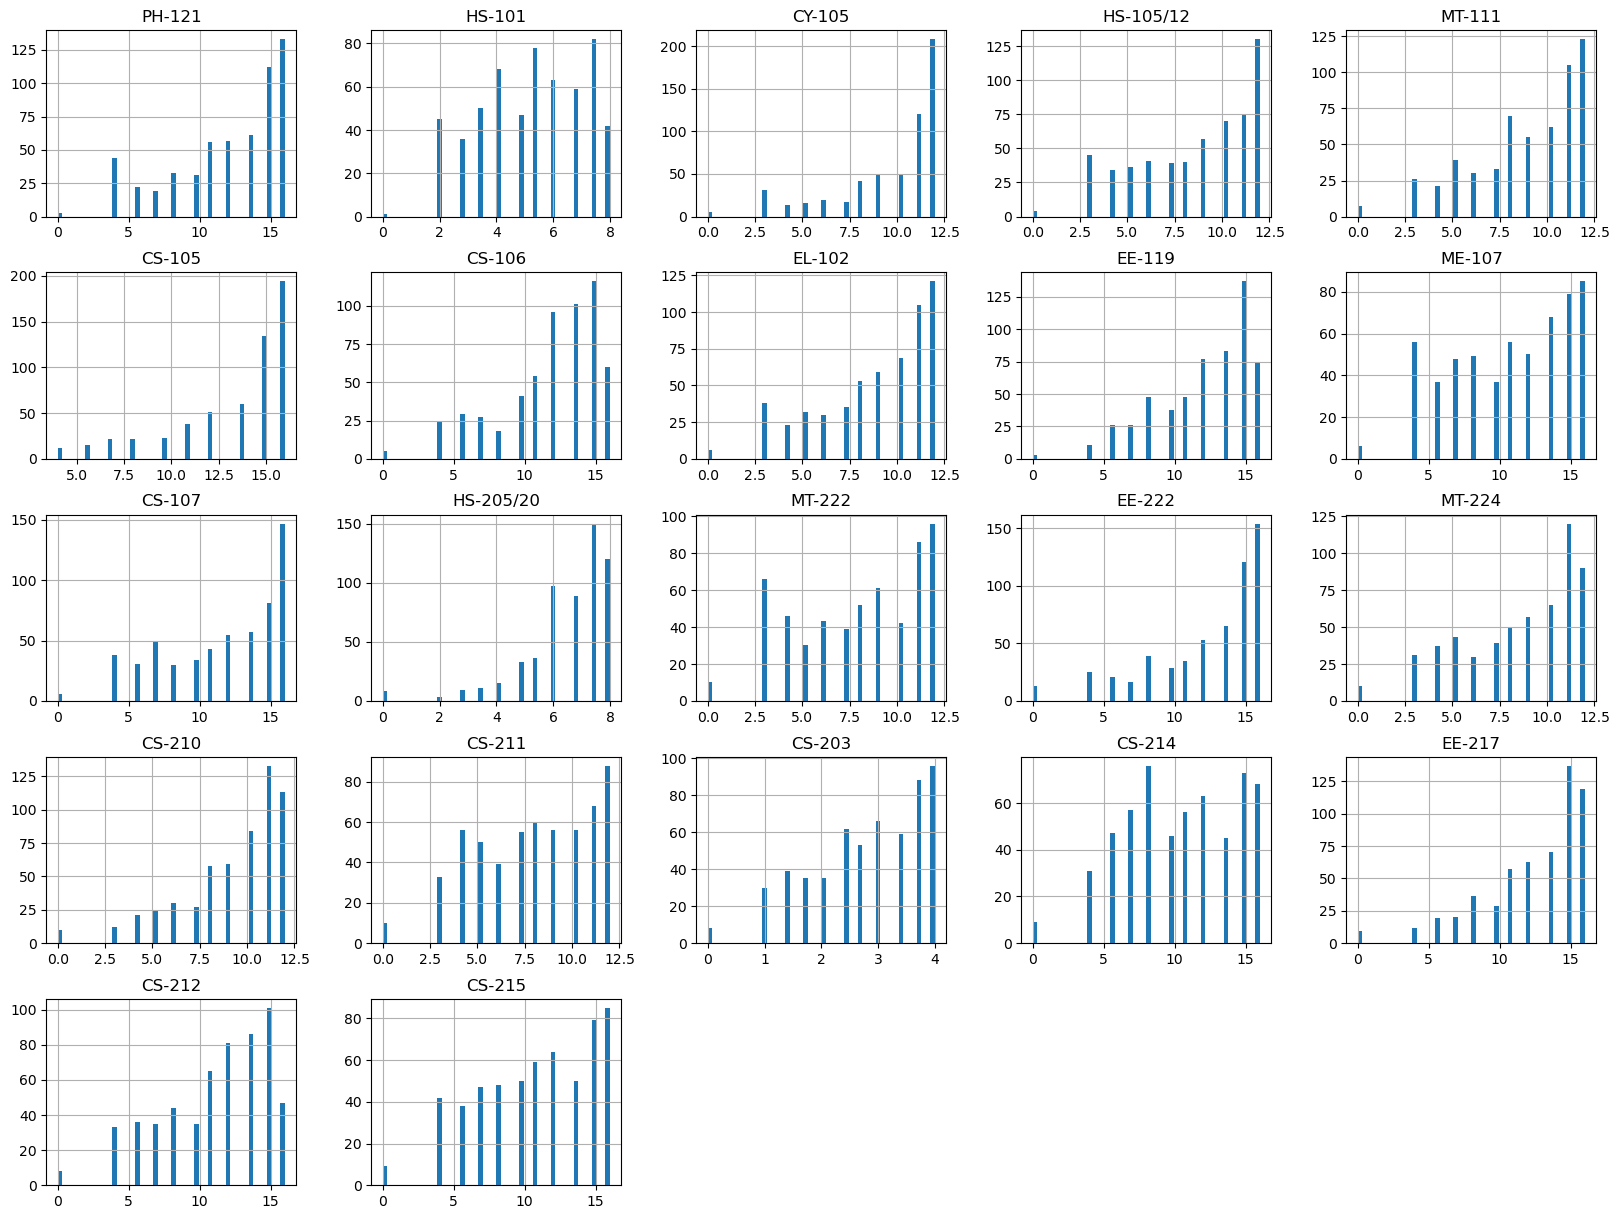

In [40]:
second_year.hist(bins=50, figsize=(20, 15))

# SVM REGRESSOR

In [41]:
from sklearn.svm import SVR
Support_Vector_Regressor_Model_model_2=SVR(kernel='linear')

In [42]:
Support_Vector_Regressor_Model_model_2.fit(X_train,y_train)

SVR(kernel='linear')

In [43]:
Predictions_of_Support_Vector_Regressor_model_2=Support_Vector_Regressor_Model_model_2.predict(X_test) #Try to predict(output) of test data
Predictions_of_Support_Vector_Regressor_model_2

array([3.35625911, 2.71871174, 3.38780333, 3.35089427, 3.49704986,
       2.35721267, 2.34141978, 3.67711825, 3.38968094, 2.07080812,
       3.64550274, 3.18111301, 3.72304357, 3.1464964 , 3.79072754,
       0.57602052, 1.87210907, 2.72149564, 2.61760381, 1.89842937,
       1.79600042, 2.30300775, 2.68655184, 2.89500181, 2.72320995,
       3.11690429, 3.19061322, 3.71832874, 3.06347366, 2.4492015 ,
       3.34234532, 3.19935816, 2.1123634 , 2.49148558, 3.66183189,
       2.3952913 , 2.58467091, 3.30073722, 3.68684214, 3.14654039,
       2.56938313, 3.01617835, 2.91855301, 3.498955  , 3.5576952 ,
       3.20886269, 3.23410551, 2.67084323, 3.84048167, 3.70817054,
       3.17787574, 2.8720367 , 3.87073842, 2.83277833, 3.52911134,
       3.71934166, 1.69348541, 3.58953201, 3.73437336, 2.98811176,
       3.56081334, 2.73275454, 2.64772124, 3.76690095, 2.3755829 ,
       2.52861204, 3.59718198, 2.82793003, 2.81464926, 2.64880021,
       2.46982382, 3.66606341, 3.20409294, 3.02248761, 2.69766

In [44]:
#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(Support_Vector_Regressor_Model_model_2.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Support_Vector_Regressor_Model_model_2.score(X_test,y_test)))

Accuracy on training set: 0.907
Accuracy on test set: 0.936


# Evaluating the model

In [45]:
#calculate rmse to find error in model . Less rmse good model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_Support_Vector_Regressor_model_2)
rmse_of_Support_Vector_Regressor_model_2=np.sqrt(mse)
rmse_of_Support_Vector_Regressor_model_2

0.15628029658896778

In [46]:
#Try cross validation to overcome overfitting if happens and then take rmse for every round in cross validation
from sklearn.model_selection import cross_val_score
cross_value_3=cross_val_score(Support_Vector_Regressor_Model_model_2, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_Support_Vector_Regressor_model_2=np.sqrt(-cross_value_3)
rmse_of_Support_Vector_Regressor_model_2

array([0.28471666, 0.23463839, 0.13214569, 0.12282922, 0.15745525,
       0.16735121, 0.18723685, 0.179315  , 0.23625469, 0.17019881])

In [47]:
#calculate r^2 metric to find accuracy in model. More its value more better model
from sklearn.metrics import r2_score
r2_score3=r2_score(y_test,Predictions_of_Support_Vector_Regressor_model_2)
r2_score3

0.9362295087074235

# KNN Regressor

In [48]:
from sklearn.neighbors import KNeighborsRegressor
#calling the function of algorithm and we used standard or more commonly used k value which is 5 because our dataset is not too large not 
KNeighborsRegressor_Model_model_2=KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)#Then fit on our train inputs and outputs

In [49]:
Predictions_of_KNeighborsRegressor_model_2=KNeighborsRegressor_Model_model_2.predict(X_test)#Try to predict(output) of test data
Predictions_of_KNeighborsRegressor_model_2

array([3.4714, 2.6828, 3.646 , 3.4142, 3.5084, 2.5008, 2.54  , 3.6902,
       3.4816, 2.077 , 3.7784, 3.3566, 3.8464, 3.2438, 3.906 , 1.1342,
       1.914 , 2.8366, 2.5434, 2.3632, 1.8798, 2.1398, 2.5946, 3.1254,
       2.6608, 2.9992, 3.239 , 3.833 , 3.008 , 2.3222, 3.4134, 3.4386,
       2.063 , 2.6272, 3.59  , 2.4778, 2.6008, 3.3276, 3.811 , 3.036 ,
       2.6064, 2.872 , 3.0006, 3.5508, 3.7408, 3.3522, 3.3696, 2.7036,
       3.9612, 3.8018, 3.25  , 2.8706, 3.944 , 2.8072, 3.61  , 3.7596,
       1.9318, 3.7782, 3.8226, 3.0244, 3.733 , 2.9286, 2.5822, 3.8846,
       2.2274, 2.62  , 3.6558, 2.904 , 2.5772, 2.836 , 2.4084, 3.7838,
       3.1964, 3.2062, 2.628 , 2.3256, 1.8314, 1.8458, 3.7702, 2.2104,
       3.3634, 3.1406, 2.8414, 3.2512, 2.0962, 3.6382, 3.1292, 3.7402,
       3.054 , 2.863 , 3.3392, 2.397 , 3.091 , 2.7644, 3.0784, 3.549 ,
       3.2194, 3.8546, 2.5702, 3.5454, 2.3594, 3.4396, 2.6672, 2.3362,
       2.0546, 3.7746, 3.6424, 3.4328, 3.3228, 3.3224, 3.6596, 2.7598,
      

In [50]:
#For training and testing accuracy#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(KNeighborsRegressor_Model_model_2.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(KNeighborsRegressor_Model_model_2.score(X_test,y_test)))


Accuracy on training set: 0.936
Accuracy on test set: 0.927


# Evaluating the model

In [51]:
#calculate rmse to find error in model . Less rmse good model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_KNeighborsRegressor_model_2)
rmse_of_KNeighborsRegressor_model_2=np.sqrt(mse)
rmse_of_KNeighborsRegressor_model_2

0.16708347718379002

In [52]:
#Try cross validation to overcome overfitting if happens and then take rmse for every round in cross validation
from sklearn.model_selection import cross_val_score
cross_value_4=cross_val_score(KNeighborsRegressor_Model_model_2, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_KNeighborsRegressor_model_2=np.sqrt(-cross_value_4)
rmse_of_KNeighborsRegressor_model_2

array([0.23477515, 0.33047671, 0.17144239, 0.18294279, 0.19707703,
       0.21301617, 0.21793104, 0.16552408, 0.28288837, 0.18533414])

In [53]:
#calculate r^2 metric to find accuracy in model. More its value more better model
from sklearn.metrics import r2_score
r2_score4=r2_score(y_test,Predictions_of_KNeighborsRegressor_model_2)
r2_score4

0.927108259740551

# Linear Regression

In [54]:
Linear_Regression_Model_model_2=LinearRegression()

In [55]:
Linear_Regression_Model_model_2.fit(X_train,y_train)

LinearRegression()

In [56]:
Predictions_of_Linear_Regression_model_2=Linear_Regression_Model_model_2.predict(X_test) #Try to predict(output) of test data
Predictions_of_Linear_Regression_model_2

array([3.32383376, 2.80944353, 3.36909454, 3.35231916, 3.49391745,
       2.35758908, 2.40466993, 3.67519294, 3.39484925, 2.29509538,
       3.67429808, 3.16029931, 3.71942118, 3.12780247, 3.76532327,
       0.75708511, 1.98005606, 2.81924453, 2.58891307, 1.9673238 ,
       1.90496477, 2.34791507, 2.67929542, 2.87523037, 2.7415895 ,
       3.00253382, 3.16253057, 3.72469365, 2.97287971, 2.53192184,
       3.38843487, 3.17861552, 2.21374291, 2.46757305, 3.6250937 ,
       2.47321282, 2.68279437, 3.27519132, 3.64705014, 3.11770599,
       2.41855886, 2.94590416, 2.9749078 , 3.40343449, 3.56987572,
       3.13713934, 3.26089447, 2.67190686, 3.82155157, 3.69432063,
       3.16219195, 2.87789742, 3.86212561, 2.76796354, 3.5394247 ,
       3.71767768, 1.72554004, 3.60169783, 3.72998497, 2.9078122 ,
       3.50223718, 2.72772607, 2.74639097, 3.77847151, 2.37992651,
       2.57598059, 3.54691254, 2.83666039, 2.83341264, 2.68969838,
       2.50472222, 3.69973517, 3.20904631, 3.00716859, 2.80160

In [57]:
#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(Linear_Regression_Model_model_2.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Linear_Regression_Model_model_2.score(X_test,y_test)))

Accuracy on training set: 0.918
Accuracy on test set: 0.925


# Evaluating the model

In [58]:
#calculate rmse to find error in model. Less rmse good model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_Linear_Regression_model_2)
rmse_of_Linear_Regression_1_model_2=np.sqrt(mse)
rmse_of_Linear_Regression_1_model_2

0.16905481303878153

In [59]:
#Try cross validation to overcome overfitting if happens and then take rmse for every round in cross validation
from sklearn.model_selection import cross_val_score
cross_value_1=cross_val_score(Linear_Regression_Model_model_2, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_Linear_Regression_model_2=np.sqrt(-cross_value_1)
rmse_of_Linear_Regression_model_2

array([0.30004025, 0.25774715, 0.12489025, 0.12892769, 0.17071612,
       0.16110742, 0.18874971, 0.17491043, 0.24041046, 0.17049155])

In [60]:
#calculate r^2 metric to find accuracy in model. More its value more better model
from sklearn.metrics import r2_score
r2_score7=r2_score(y_test,Predictions_of_Linear_Regression_model_2)
r2_score7

0.9253780852003551

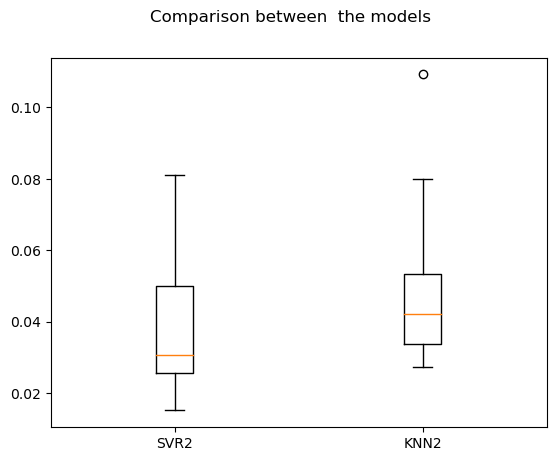

In [61]:
#For comparision between 2 models on basis of cross validation
results=[]
results.append(-cross_value_3)
results.append(-cross_value_4)
models=[('SVR2',Support_Vector_Regressor_Model_model_2),('KNN2',KNeighborsRegressor_Model_model_2)]
scoring='accuracy'
names=[]
for name,model in models:
    names.append(name)
#Boxplot Algorithm Comparison
fig=plt.figure()
fig.suptitle('Comparison between  the models')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# MODEL3

In [62]:
courses.rename(columns = {'MT-442':'MT_442'}, inplace = True)
column_to_move=courses.pop("MT_442")
courses.insert(33, "MT_442", column_to_move)#There is a course of fourth year in third year data so we move it
third_year=courses.iloc[:, 0:33] #SEPARATING THE COURSES OF FIRST YEAR, SECOND YEAR AND THIRD YEAR FOR MODEL 3 from data

In [63]:
third_year.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EF-303,HS-304,CS-301,CS-302,TC-383,EL-332,CS-318,CS-306,CS-312,CS-317
0,10.8,2.8,5.1,6.0,5.1,5.6,4.0,5.1,10.8,6.8,...,5.1,4.8,12.0,6.0,4.8,4.0,6.8,8.0,5.1,5.1
1,16.0,2.0,4.2,3.0,8.1,8.0,4.0,12.0,5.6,4.0,...,3.0,3.4,14.8,4.2,3.4,4.0,14.8,4.0,4.2,3.0
2,16.0,6.0,12.0,8.1,10.2,16.0,10.8,10.2,14.8,14.8,...,7.2,8.0,13.6,11.1,6.0,6.8,14.8,14.8,9.0,9.0
3,4.0,4.8,4.2,3.0,3.0,14.8,5.6,5.1,4.0,9.6,...,3.0,5.4,4.0,8.1,2.8,2.8,13.6,6.8,4.2,6.0
4,14.8,7.4,11.1,10.2,12.0,16.0,14.8,10.2,16.0,14.8,...,5.1,7.4,10.8,11.1,4.8,7.4,10.8,14.8,8.1,10.2


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(third_year,output,test_size=0.2) #SPLITTING THE DATASET INTO TRAINING AND TESTING PART

In [65]:
len(X_train)

456

In [66]:
len(X_test)

115

array([[<AxesSubplot:title={'center':'PH-121'}>,
        <AxesSubplot:title={'center':'HS-101'}>,
        <AxesSubplot:title={'center':'CY-105'}>,
        <AxesSubplot:title={'center':'HS-105/12'}>,
        <AxesSubplot:title={'center':'MT-111'}>,
        <AxesSubplot:title={'center':'CS-105'}>],
       [<AxesSubplot:title={'center':'CS-106'}>,
        <AxesSubplot:title={'center':'EL-102'}>,
        <AxesSubplot:title={'center':'EE-119'}>,
        <AxesSubplot:title={'center':'ME-107'}>,
        <AxesSubplot:title={'center':'CS-107'}>,
        <AxesSubplot:title={'center':'HS-205/20'}>],
       [<AxesSubplot:title={'center':'MT-222'}>,
        <AxesSubplot:title={'center':'EE-222'}>,
        <AxesSubplot:title={'center':'MT-224'}>,
        <AxesSubplot:title={'center':'CS-210'}>,
        <AxesSubplot:title={'center':'CS-211'}>,
        <AxesSubplot:title={'center':'CS-203'}>],
       [<AxesSubplot:title={'center':'CS-214'}>,
        <AxesSubplot:title={'center':'EE-217'}>,
        <Ax

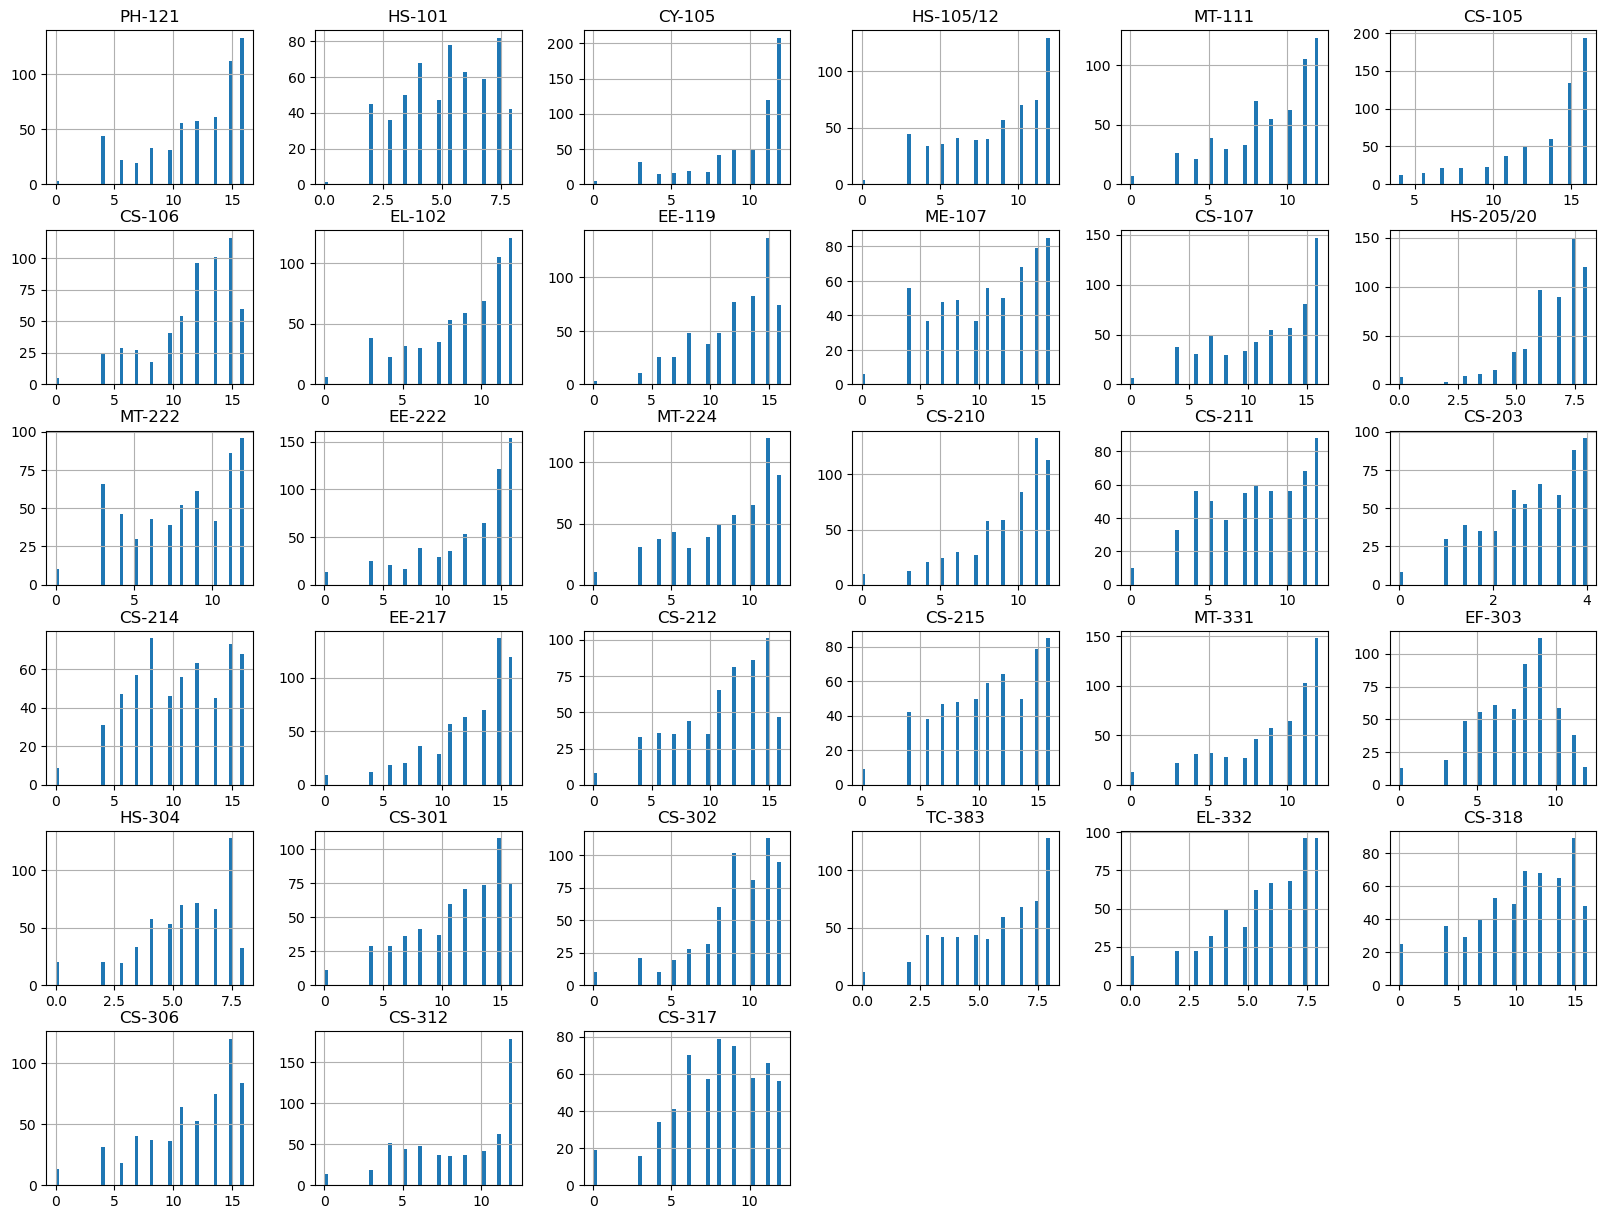

In [67]:
third_year.hist(bins=50, figsize=(20, 15))

# Random forest

In [68]:
from sklearn.ensemble import RandomForestRegressor
Random_Forest_Model_model_3=RandomForestRegressor()

In [69]:
Random_Forest_Model_model_3.fit(X_train,y_train)

RandomForestRegressor()

In [70]:
Predictions_of_Random_Forest_model_3=Random_Forest_Model_model_3.predict(X_test) #Try to predict(output) of test data
Predictions_of_Random_Forest_model_3


array([2.57843, 3.23458, 2.60827, 2.76909, 2.2559 , 2.39321, 3.35221,
       3.73395, 2.23212, 3.46044, 3.85766, 2.87808, 3.463  , 2.56505,
       2.52814, 2.58227, 3.27224, 2.53318, 2.68289, 3.35458, 3.45979,
       2.59437, 2.29396, 3.1065 , 2.89102, 3.80334, 2.51122, 3.03219,
       3.28647, 2.42339, 3.06509, 3.8746 , 3.5462 , 2.63918, 3.26989,
       2.96435, 3.54946, 3.2051 , 2.33338, 3.33554, 2.53569, 2.61094,
       3.17931, 3.68936, 3.52774, 3.49905, 3.34852, 2.89016, 2.68481,
       3.70221, 3.47413, 2.68056, 2.14772, 2.95002, 2.82051, 2.18512,
       2.41721, 3.15358, 3.46526, 2.84194, 3.14332, 2.07249, 3.1345 ,
       2.64696, 2.50288, 3.11523, 2.26397, 3.63695, 2.1514 , 3.23551,
       2.95094, 2.39169, 3.90484, 3.18181, 2.41709, 1.12703, 2.65546,
       2.01615, 3.23874, 2.91151, 3.38594, 2.44483, 3.13008, 3.79536,
       2.34112, 3.35578, 2.64137, 3.28565, 2.13642, 2.47296, 3.50893,
       3.02447, 2.13419, 2.27233, 3.48652, 3.66426, 1.42226, 2.97986,
       2.31354, 3.15

In [71]:
#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(Random_Forest_Model_model_3.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Random_Forest_Model_model_3.score(X_test,y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.957


# evaluating the model

In [72]:
#calculate rmse to find error in model . Less rmse good model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_Random_Forest_model_3)
rmse_of_Random_Forest_1_model_3=np.sqrt(mse)
rmse_of_Random_Forest_1_model_3

0.13507400377442047

In [73]:
#Try cross validation to overcome overfitting if happens and then take rmse for every round in cross validation
from sklearn.model_selection import cross_val_score
cross_value_5=cross_val_score(Random_Forest_Model_model_3, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_Random_Forest_model_3=np.sqrt(-cross_value_5)
rmse_of_Random_Forest_model_3

array([0.18113599, 0.2127162 , 0.11048848, 0.20064293, 0.16203297,
       0.16638798, 0.32391577, 0.09322976, 0.1851179 , 0.183453  ])

In [74]:
#calculate r^2 metric to find accuracy in model. More its value more better model

from sklearn.metrics import r2_score
r2_score5=r2_score(y_test,Predictions_of_Random_Forest_model_3)
r2_score5

0.9571071817359564

# DecisionTree Regressor

In [75]:
from sklearn.tree import DecisionTreeRegressor
Decision_Tree_Model_model_3=DecisionTreeRegressor()#calling the function of algorithm

In [76]:
Decision_Tree_Model_model_3.fit(X_train,y_train)

DecisionTreeRegressor()

In [77]:
Predictions_of_Decision_Tree_model_3=Decision_Tree_Model_model_3.predict(X_test)#Try to predict(output) of test data
Predictions_of_Decision_Tree_model_3

array([3.023, 3.365, 2.785, 2.146, 2.246, 2.576, 3.363, 3.659, 2.793,
       3.516, 3.737, 2.603, 3.44 , 1.835, 2.146, 2.704, 3.227, 2.555,
       2.619, 3.205, 3.396, 2.294, 2.696, 3.075, 3.325, 3.772, 1.747,
       3.019, 2.995, 2.171, 2.845, 3.946, 3.408, 2.611, 3.4  , 3.044,
       3.734, 3.369, 2.773, 3.723, 2.605, 2.478, 3.227, 3.761, 3.694,
       3.335, 3.523, 2.773, 2.861, 3.876, 3.499, 2.701, 2.035, 3.033,
       2.914, 2.793, 2.484, 3.176, 3.396, 2.659, 3.042, 1.658, 3.03 ,
       2.782, 2.773, 3.167, 2.264, 3.625, 1.805, 3.058, 3.156, 2.294,
       3.798, 3.219, 2.749, 0.998, 2.612, 1.806, 3.219, 2.851, 3.473,
       2.922, 3.156, 3.876, 2.595, 3.356, 2.605, 3.369, 2.028, 2.171,
       3.396, 2.854, 2.595, 2.084, 3.49 , 3.651, 0.998, 3.014, 2.352,
       3.026, 3.405, 2.196, 3.042, 3.925, 3.571, 2.264, 0.8  , 2.288,
       2.793, 3.205, 3.798, 1.747, 2.451, 3.586, 3.631])

In [78]:
#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(Decision_Tree_Model_model_3.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Decision_Tree_Model_model_3.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.817


# Evaluating the model

In [79]:
#calculate rmse to find error in model . Less rmse good model
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_Decision_Tree_model_3)
rmse_of_Decision_Tree_1_model_3=np.sqrt(mse)
rmse_of_Decision_Tree_1_model_3

0.27914393980603414

In [80]:
#Try cross validation to overcome overfitting if happens and then take rmse for every round in cross validation
from sklearn.model_selection import cross_val_score
cross_value_6=cross_val_score(Decision_Tree_Model_model_3, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_Decision_Tree_model_3=np.sqrt(-cross_value_6)
rmse_of_Decision_Tree_model_3

array([0.45832439, 0.38350695, 0.29521094, 0.35438468, 0.19884165,
       0.30058549, 0.34624702, 0.29816195, 0.25021627, 0.18146951])

In [81]:
#calculate r^2 metric to find accuracy in model. More its value more better model
from sklearn.metrics import r2_score
r2_score6=r2_score6=r2_score(y_test,Predictions_of_Decision_Tree_model_3)
r2_score6

0.8168118217566716

# Linnear Regression

In [82]:
Linear_Regression_Model_model_3=LinearRegression()

In [83]:
Linear_Regression_Model_model_3.fit(X_train,y_train)

LinearRegression()

In [84]:
Predictions_of_Linear_Regression_model_3=Linear_Regression_Model_model_3.predict(X_test) #Try to predict(output) of test data
Predictions_of_Linear_Regression_model_3

array([2.68827299, 3.29486031, 2.53845749, 2.70482566, 2.17156361,
       2.44850818, 3.20769114, 3.74157158, 2.16538706, 3.43864832,
       3.79333287, 2.86110946, 3.53778502, 2.3998897 , 2.67718352,
       2.47727107, 3.28354138, 2.50162435, 2.73378418, 3.34902491,
       3.32813739, 2.70912911, 2.12510356, 3.174636  , 2.88958512,
       3.80160912, 2.54754916, 3.1188016 , 3.06016346, 2.26429124,
       3.02733539, 3.86736133, 3.59398339, 2.78189728, 3.25730781,
       2.90774033, 3.68618762, 3.21515174, 2.10162739, 3.45900644,
       2.43843361, 2.6721415 , 3.41694374, 3.66809195, 3.59570288,
       3.443837  , 3.31184333, 2.66005439, 2.79177485, 3.5740195 ,
       3.65554788, 2.85196126, 2.2629409 , 3.11641779, 2.71658303,
       2.2912989 , 2.3578458 , 3.09014426, 3.25206116, 3.01433096,
       3.11612956, 1.77415207, 3.10421621, 2.68059807, 2.58729532,
       3.21205069, 2.03871206, 3.74415042, 2.05286735, 3.28232179,
       2.5686649 , 2.37203027, 3.87197257, 3.31998487, 2.27538

In [85]:
#For training and testing accuracy
print("Accuracy on training set: {:.3f}".format(Linear_Regression_Model_model_3.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(Linear_Regression_Model_model_3.score(X_test,y_test)))

Accuracy on training set: 0.949
Accuracy on test set: 0.954


# Evaluating the model

In [86]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,Predictions_of_Linear_Regression_model_3)
rmse_of_Linear_Regression_1_model_3=np.sqrt(mse)
rmse_of_Linear_Regression_1_model_3

0.1401872172843396

In [87]:
from sklearn.model_selection import cross_val_score
cross_value_1=cross_val_score(Linear_Regression_Model_model_3, X_test,y_test,scoring="neg_mean_squared_error" ,cv=10)
rmse_of_Linear_Regression_model_3=np.sqrt(-cross_value_1)
rmse_of_Linear_Regression_model_3

array([0.10047039, 0.06086776, 0.09085595, 0.11395166, 0.16125365,
       0.1544637 , 0.22512188, 0.11773036, 0.20798156, 0.16518828])

In [88]:
from sklearn.metrics import r2_score
r2_score8=r2_score(y_test,Predictions_of_Linear_Regression_model_3)
r2_score8

0.9537983095175415

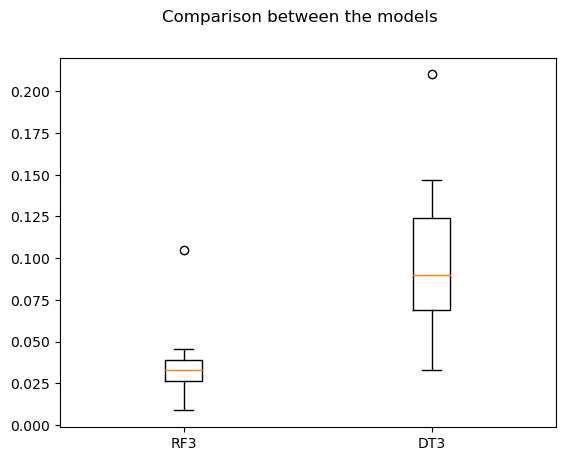

In [89]:
#For comparision between 2 models on basis of cross validation
results=[]
results.append(-cross_value_5)
results.append(-cross_value_6)
models=[('RF3',Random_Forest_Model_model_3),('DT3',Decision_Tree_Model_model_3)]
scoring='accuracy'
names=[]
for name,model in models:
    names.append(name)
#Boxplot Algorithm Comparison
fig=plt.figure()
fig.suptitle('Comparison between the models')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()